# Центральная предельная теорема своими руками

In [163]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## I Бета-распределение: теоретические сведения

Носитель: $ x \in [0, 1] $ 

Плотность распределения вероятности:
$ f(x) = \cfrac{\Gamma (a+b)\ x^{a-1}\ (1-x)^{b-1}}{\Gamma(a)\ \Gamma(b)}$, где $\Gamma(c)$ - гамма-функция Эйлера

Математическое ожидание: $ EX = \cfrac{a}{a + b}  $

Дисперсия: $ DX = \cfrac{a\ b}{(a+b)^2\ (a+b+1)}  $

Ссылка на статью в Википедии: https://ru.wikipedia.org/wiki/Бета-распределение

## II Практическая часть: визуализация

Сразу зададим параметры нашего бета-распределения, посчитаем математическое ожидание и дисперсию.

In [164]:
a = 2
b = 5
EX = float(a) / (a + b)
DX = float(a) * b / ((a + b) * (a + b) * (a + b + 1))

Нарисуем на одном графике теоретическую плотность распределения и гистограмму, для выборки объема 1000.

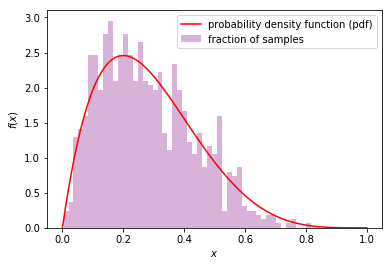

In [165]:
# генерируем выборку объема n
n = 1000
beta_rv = sts.beta(a, b)
sample = beta_rv.rvs(n)

# рисуем теоретическую плотность распределения
x_th = np.linspace(0, 1, 100)
y_th = beta_rv.pdf(x_th)
plt.plot(x_th, y_th, label='probability density function (pdf)', color='red')

# добавляем гистограмму выборки
plt.hist(sample, bins=50, normed=True, label='fraction of samples', alpha=0.3, color='purple')

# настройки графика
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.show()

## III Практическая часть: оценка распределение выборочного при разных объёмах выборок

Для получения выборочного среднего будем генерировать $k$ выборок заданного объема

In [166]:
k = 1000

### 1. Выборка объема $n_1 = 3$

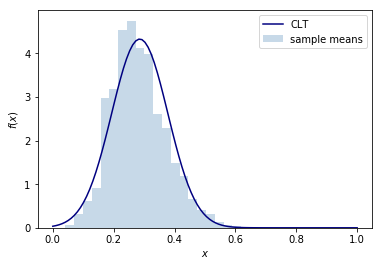

In [170]:
n1 = 3

# лист из средних значений
mean = []

for i in xrange(k):
    beta_rv = sts.beta(a, b)
    sample = beta_rv.rvs(n1)
    
    sample_mean = sum(sample) / float(len(sample))
    mean.append(sample_mean)    

# рисуем гистограмму выборки
plt.hist(mean, bins=20, normed=True, label='sample means', alpha=0.3, color='steelblue')

# добавляем соответствующую плотность нормального распределения
norm_rv = sts.norm(loc=EX, scale=math.sqrt(DX/n1))
x = np.linspace(0, 1, 100)
y = norm_rv.pdf(x)
plt.plot(x, y, label='CLT', color='navy')

# настройки графика
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.show()

### 2. Выборка объема $n_2 = 10$

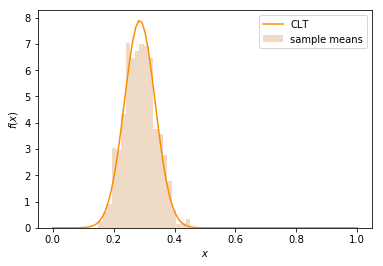

In [171]:
n2 = 10

# лист из средних значений
mean = []

for i in xrange(k):
    beta_rv = sts.beta(a, b)
    sample = beta_rv.rvs(n2)
    
    sample_mean = sum(sample) / float(len(sample))
    mean.append(sample_mean)    

# рисуем гистограмму выборки
plt.hist(mean, bins=20, normed=True, label='sample means', alpha=0.3, color='peru')

# добавляем соответствующую плотность нормального распределения
norm_rv = sts.norm(loc=EX, scale=math.sqrt(DX/n2))
x = np.linspace(0, 1, 100)
y = norm_rv.pdf(x)
plt.plot(x, y, label='CLT', color='darkorange')

# настройки графика
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.show()

### 3. Выборка объема $n_3 = 50$

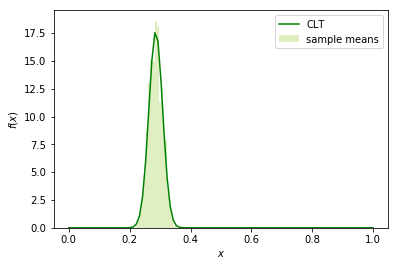

In [172]:
n3 = 50

# лист из средних значений
mean = []

for i in xrange(k):
    beta_rv = sts.beta(a, b)
    sample = beta_rv.rvs(n3)
    
    sample_mean = sum(sample) / float(len(sample))
    mean.append(sample_mean)    

# рисуем гистограмму выборки
plt.hist(mean, bins=20, normed=True, label='sample means', alpha=0.3, color='yellowgreen')

# добавляем соответствующую плотность нормального распределения
norm_rv = sts.norm(loc=EX, scale=math.sqrt(DX/n3))
x = np.linspace(0, 1, 100)
y = norm_rv.pdf(x)
plt.plot(x, y, label='CLT', color='green')

# настройки графика
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.show()

## IV Выводы

Таким образом, мы видим, что с ростом $n$ распределение выборочных средних случайной величины стремится к нормальному $N(EX, \cfrac{DX}{N})$, где $EX$ и $DX$ - математическое ожидание и дисперсия исходной случайной величины